In [ ]:
 # libraries for the files in google drive
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd


link = 'https://drive.google.com/file/d/193ND4XKmMSnqdOlbDGP36b5V5s6HcQJb/view'
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

id = link.split("/")[-2]

download = drive.CreateFile({'id': id})


download.GetContentFile('adult.csv')
df  = pd.read_csv("adult.csv")
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
df.duplicated().sum()
df.isnull().sum()

39                0
 State-gov        0
 77516            0
 Bachelors        0
 13               0
 Never-married    0
 Adm-clerical     0
 Not-in-family    0
 White            0
 Male             0
 2174             0
 0                0
 40               0
 United-States    0
 <=50K            0
dtype: int64

In [ ]:
df = df.drop_duplicates()
df.shape

(32536, 15)

In [ ]:
cat_feat = df.select_dtypes(include=['object']).columns
cat_feat

Index([' State-gov', ' Bachelors', ' Never-married', ' Adm-clerical',
       ' Not-in-family', ' White', ' Male', ' United-States', ' <=50K'],
      dtype='object')

In [ ]:
head = ['Age','Workclass','Fnlwgt','Education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','income']
df.to_csv("adultheader.csv", header=head, index=False)
df2 = pd.read_csv("adultheader.csv")
print(df2)

       Age          Workclass  Fnlwgt    Education  education_num  \
0       50   Self-emp-not-inc   83311    Bachelors             13   
1       38            Private  215646      HS-grad              9   
2       53            Private  234721         11th              7   
3       28            Private  338409    Bachelors             13   
4       37            Private  284582      Masters             14   
...    ...                ...     ...          ...            ...   
32531   27            Private  257302   Assoc-acdm             12   
32532   40            Private  154374      HS-grad              9   
32533   58            Private  151910      HS-grad              9   
32534   22            Private  201490      HS-grad              9   
32535   52       Self-emp-inc  287927      HS-grad              9   

            marital_status          occupation    relationship    race  \
0       Married-civ-spouse     Exec-managerial         Husband   White   
1                 Divor

In [ ]:
print(f"Ratio above 50k : {(df2['income'] == ' >50K').astype('int').sum() / df.shape[0] * 100 :.2f}%")

Ratio above 50k : 24.09%


In [ ]:
num_feat = df2.select_dtypes(include=['int64']).columns
num_feat

Index(['Age', 'Fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')

<Figure size 1152x720 with 0 Axes>

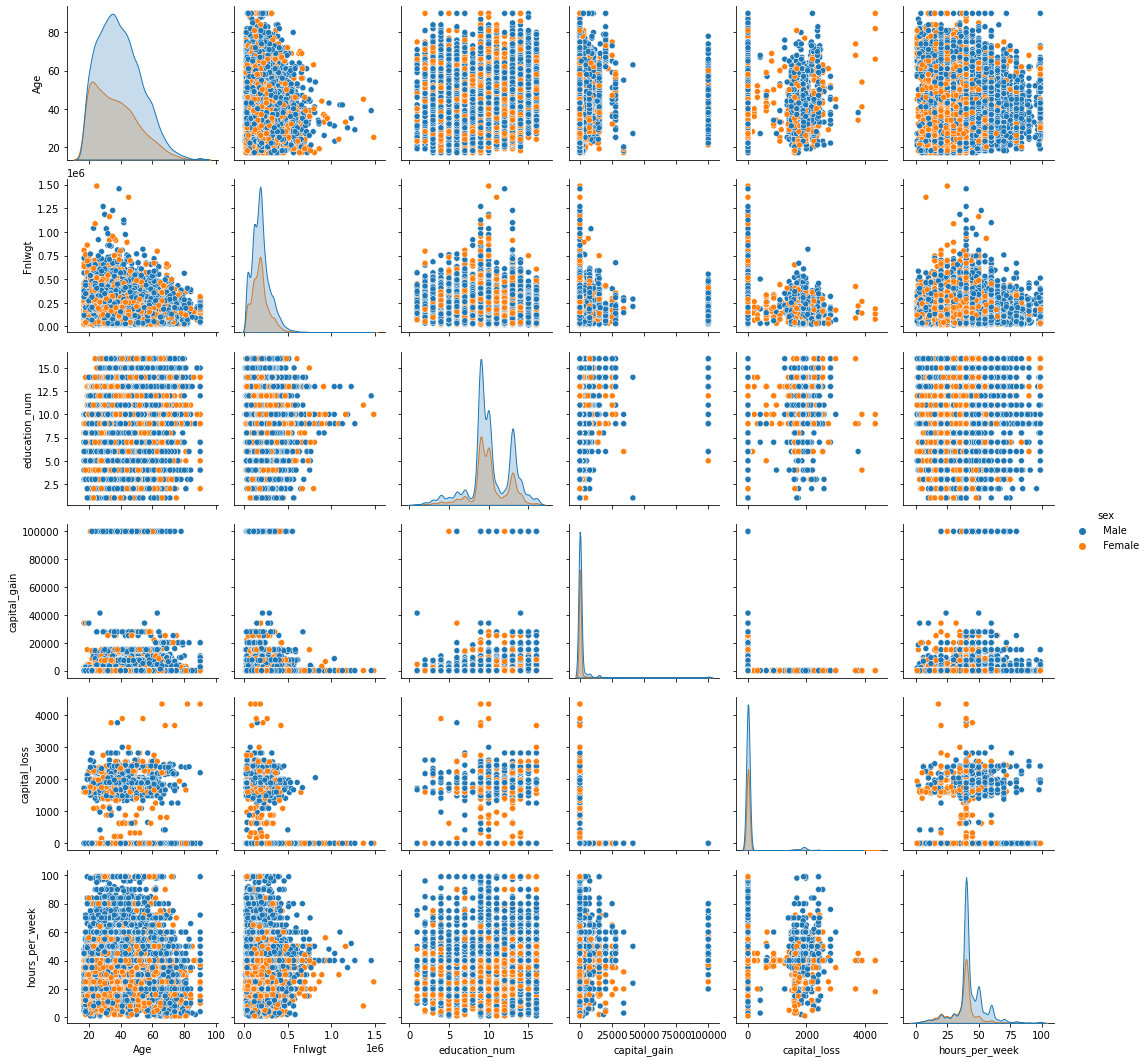

In [ ]:
plt.figure(1, figsize=(16,10))
sns.pairplot(data=df2, hue='sex')
plt.show()

In [ ]:
nb_female = (df2.sex == ' Female').astype('int').sum()
nb_male = (df2.sex == ' Male').astype('int').sum()
nb_female, nb_male

(10762, 21774)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


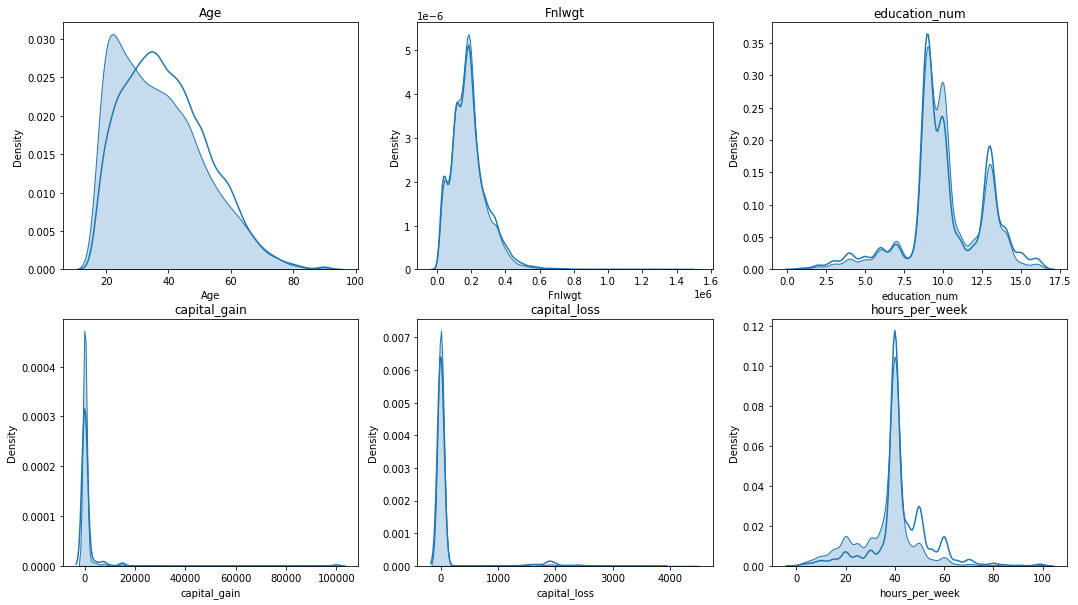

In [ ]:
plt.figure(figsize=(18,10))
plt.subplot(231)

i=0
for c in num_feat:
    plt.subplot(2, 3, i+1)
    i += 1
    sns.kdeplot(df2[df2['sex'] == ' Female'][c], shade=True)
    sns.kdeplot(df2[df2['sex'] == ' Male'][c], shade=False)
    plt.title(c)

plt.show()

In [ ]:
# plt.figure(figsize=(18,25))
# plt.subplot(521)

# i=0
# for c in cat_feat:
#     plt.subplot(5, 2, i+1)
#     i += 1
#     sns.countplot(x=c, data=df2, hue='sex')
#     plt.title(c)

# plt.show()

In [ ]:
nb_male_above = len(df2[(df2.income == ' >50K') & (df2.sex == ' Male')])
nb_male_below = len(df2[(df2.income == ' <=50K') & (df2.sex == ' Male')])
nb_female_above = len(df2[(df2.income == ' >50K') & (df2.sex == ' Female')])
nb_female_below = len(df2[(df2.income == ' <=50K') & (df2.sex == ' Female')])
nb_male_above, nb_male_below, nb_female_above, nb_female_below

(6660, 15114, 1179, 9583)

In [ ]:
print(nb_male_above)
print(nb_male)


6660
21774


In [ ]:
print(f'Among Males   : {(nb_male_above/nb_male)*100:.0f}% earn >50K // {(nb_male_below/nb_male)*100:.0f}% earn <=50K')
print(f'Among Females : {(nb_female_above/nb_female)*100:.0f}% earn >50K // {(nb_female_below/nb_female)*100:.0f}% earn <=50K')

Among Males   : 31% earn >50K // 69% earn <=50K
Among Females : 11% earn >50K // 89% earn <=50K


In [ ]:
nb_male_above /= nb_male
nb_male_below /= nb_male
nb_female_above /= nb_female
nb_female_below /= nb_female
nb_male_above, nb_male_below, nb_female_above, nb_female_below

(0.30586938550564896,
 0.6941306144943511,
 0.1095521278572756,
 0.8904478721427244)

In [ ]:
print(f'Among people earning >50K  : {nb_male_above / (nb_male_above + nb_female_above) *100 :.0f}% are Females and {nb_female_above / (nb_male_above + nb_female_above) *100 :.0f}% are Males')
print(f'Among people earning =<50K : {nb_male_below / (nb_male_below + nb_female_below) *100 :.0f}% are Females and {nb_female_below / (nb_male_below + nb_female_below) *100 :.0f}% are Males')

Among people earning >50K  : 74% are Females and 26% are Males
Among people earning =<50K : 44% are Females and 56% are Males


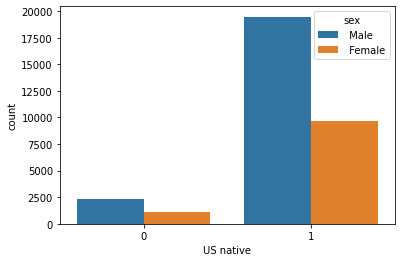

In [ ]:
df2['US native'] = (df2['native_country'] == ' United-States').astype('int')
plt.figure(figsize=(6,4))
sns.countplot(x='US native', data=df2, hue='sex')
plt.show()

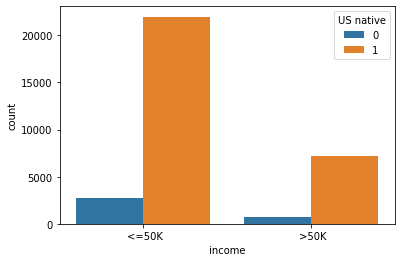

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='income', data=df2, hue='US native')
plt.show()

In [ ]:
nb_native_above = len(df2[(df2.income == ' >50K') & (df2['US native'] == 1)])
nb_native_below = len(df2[(df2.income == ' <=50K') & (df2['US native'] == 1)])
nb_foreign_above = len(df2[(df2.income == ' >50K') & (df2['US native'] == 0)])
nb_foreign_below = len(df2[(df2.income == ' <=50K') & (df2['US native'] == 0)])
nb_native_above, nb_native_below, nb_foreign_above, nb_foreign_below

(7169, 21983, 670, 2714)

In [ ]:
nb_native = (df2['US native'] == 1).astype('int').sum()
nb_foreign = df2.shape[0] - nb_native
nb_native, nb_foreign

(29152, 3384)

In [ ]:
print(f'Among natives    : {(nb_native_above/nb_native)*100:.0f}% earn >50K // {(nb_native_below/nb_native)*100:.0f}% earn <=50K')
print(f'Among foreigners : {(nb_foreign_above/nb_foreign)*100:.0f}% earn >50K // {(nb_foreign_below/nb_foreign)*100:.0f}% earn <=50K')

Among natives    : 25% earn >50K // 75% earn <=50K
Among foreigners : 20% earn >50K // 80% earn <=50K


In [ ]:
nb_native_above /= nb_native
nb_native_below /= nb_native
nb_foreign_above /= nb_foreign
nb_foreign_below /= nb_foreign
nb_native_above, nb_native_below, nb_foreign_above, nb_foreign_below

(0.24591794731064764,
 0.7540820526893524,
 0.1979905437352246,
 0.8020094562647754)

In [ ]:
print(f'Among people earning >50K  : {nb_native_above / (nb_native_above + nb_foreign_above) *100 :.0f}% are natives and {nb_foreign_above / (nb_native_above + nb_foreign_above) *100 :.0f}% are foreigners')
print(f'Among people earning =<50K : {nb_native_below / (nb_native_below + nb_foreign_below) *100 :.0f}% are natives and {nb_foreign_below / (nb_native_below + nb_foreign_below) *100 :.0f}% are foreigners')

Among people earning >50K  : 55% are natives and 45% are foreigners
Among people earning =<50K : 48% are natives and 52% are foreigners


In [ ]:
num_feat = df2.select_dtypes(include=['float', 'int']).columns
num_feat

Index(['Age', 'Fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'US native'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


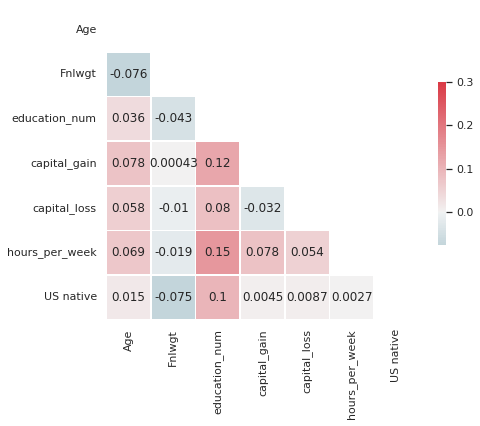

In [ ]:
sns.set(style="white")

corr = df2[num_feat].corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


f, ax = plt.subplots(figsize=(7, 6))


cmap = sns.diverging_palette(220, 10, as_cmap=True)


sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

In [ ]:
df2['income'] = pd.get_dummies(df2['income'], prefix='income', drop_first=True)

In [ ]:
y = df2.income
df2 = df2.drop(columns=['income'])

In [ ]:
print(f'Ratio above 50k:  {y.sum()/len(y)*100:.2f}%')

Ratio above 50k:  24.09%


In [ ]:
df2.head()

,Age,Workclass,Fnlwgt,Education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,US native
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,1
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,1
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,1
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,1


In [ ]:
cols = list(df2.columns)
cols

['Age',
 'Workclass',
 'Fnlwgt',
 'Education',
 'education_num',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'native_country',
 'US native']

In [ ]:
selected_feat = cols.copy()
selected_feat.remove('US native')
selected_feat

['Age',
 'Workclass',
 'Fnlwgt',
 'Education',
 'education_num',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'native_country']

In [ ]:
df2_final = df2[selected_feat]

In [ ]:
cat_feat = df2_final.select_dtypes(include=['object']).columns
X = pd.get_dummies(df2_final[cat_feat], drop_first=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
def print_score(model, name):
    model.fit(X_train, y_train)
    print('Accuracy score of the', name, f': on train = {model.score(X_train, y_train)*100:.2f}%, on test = {model.score(X_test, y_test)*100:.2f}%')

In [ ]:
print_score(LogisticRegression(),'LogisticReg')

Accuracy score of the LogisticReg : on train = 83.28%, on test = 83.16%


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
#Decision Tree

print_score(DecisionTreeClassifier(), 'DecisionTreeClf')

Accuracy score of the DecisionTreeClf : on train = 86.87%, on test = 81.71%


In [ ]:
rf = RandomForestClassifier().fit(X_train, y_train)
print(f'Accuracy score of the RandomForrest: on train = {rf.score(X_train, y_train)*100:.2f}%, on test = {rf.score(X_test, y_test)*100:.2f}%')

Accuracy score of the RandomForrest: on train = 86.86%, on test = 82.45%


In [ ]:
print_score(DecisionTreeClassifier(), 'ExtraTreesClf')

Accuracy score of the ExtraTreesClf : on train = 86.87%, on test = 81.85%


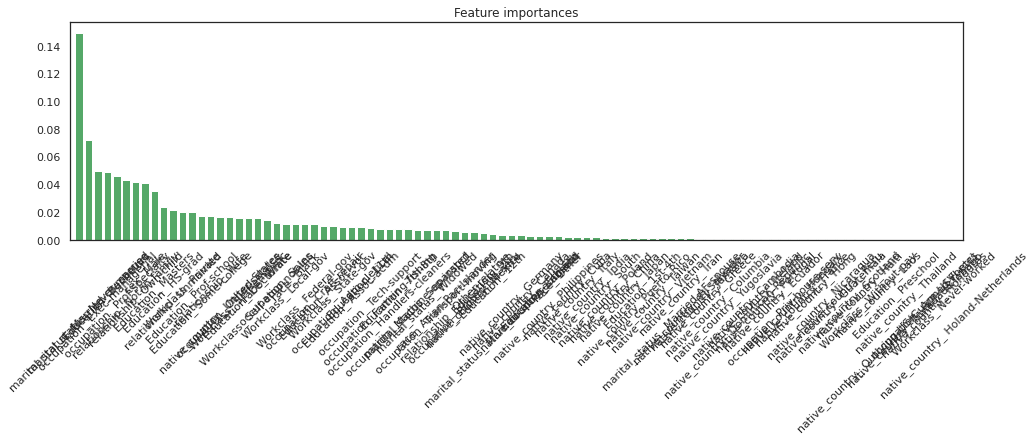

marital_status_ Married-civ-spouse - 0.149
marital_status_ Never-married - 0.072
occupation_ Exec-managerial - 0.050
Education_ Bachelors - 0.049
occupation_ Prof-specialty - 0.046
relationship_ Not-in-family - 0.044
relationship_ Own-child - 0.042
sex_ Male - 0.041
Education_ Masters - 0.035
Education_ HS-grad - 0.024
relationship_ Unmarried - 0.021
Workclass_ Private - 0.020
Education_ Prof-school - 0.020
Education_ Some-college - 0.017
relationship_ Wife - 0.017
native_country_ United-States - 0.017
occupation_ Other-service - 0.017
Workclass_ Self-emp-inc - 0.016
Education_ Doctorate - 0.016
Workclass_ Self-emp-not-inc - 0.016
race_ White - 0.014
occupation_ Sales - 0.013
Workclass_ Local-gov - 0.012
race_ Black - 0.011
Workclass_ Federal-gov - 0.011
occupation_ Craft-repair - 0.011
Education_ Assoc-voc - 0.010
Workclass_ State-gov - 0.010
occupation_ Adm-clerical - 0.010
Education_ Assoc-acdm - 0.009
Education_ 11th - 0.009
occupation_ Tech-support - 0.009
occupation_ Farming-fish

In [ ]:
features = X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
num_features = len(importances)

# Plot the feature importances of the tree
plt.figure(figsize=(16, 4))
plt.title("Feature importances")
plt.bar(range(num_features), importances[indices], color="g", align="center")
plt.xticks(range(num_features), [features[i] for i in indices], rotation='45')
plt.xlim([-1, num_features])
plt.show()

# Print values
for i in indices:
    print ("{0} - {1:.3f}".format(features[i], importances[i]))